<font size =5>Fake News Detection Dataset</font>

Dataset separated in two files:
1. Fake.csv (23481 fake news article)
2. True.csv (21417 true news article)

Dataset columns:
1. Title: title of news article
2. Text: body text of news article
3. Subject: subject of news article
4. Date: publish date of news article

In [1]:
import pandas as pd
import numpy as np
import re
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
sns.set(style="whitegrid")

df_fake = pd.read_csv("Fake.csv")
df_true = pd.read_csv("True.csv")

#Class: 0 for fake, 1 for true
df_fake["class"] = 0
df_true["class"] = 1

In [3]:
df_fake

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
...,...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0


In [4]:
df_true

,title,text,subject,date,class
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1
...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1


In [5]:
# Combine datasets
df = pd.concat([df_fake, df_true], axis=0)
df = df.drop(["title", "subject", "date"], axis=1)

print("Data loaded successfully!!!")
df

Data loaded successfully!!!


,text,class
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0
...,...,...
21412,BRUSSELS (Reuters) - NATO allies on Tuesday we...,1
21413,"LONDON (Reuters) - LexisNexis, a provider of l...",1
21414,MINSK (Reuters) - In the shadow of disused Sov...,1
21415,MOSCOW (Reuters) - Vatican Secretary of State ...,1


<font size="5">EDA</font>


Data Types and Info: 
<class 'pandas.core.frame.DataFrame'>
Index: 44898 entries, 0 to 21416
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    44898 non-null  object
 1   class   44898 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.0+ MB

Missing Value Count: 
text     0
class    0
dtype: int64

Class Balance: 
class
0    23481
1    21417
Name: count, dtype: int64


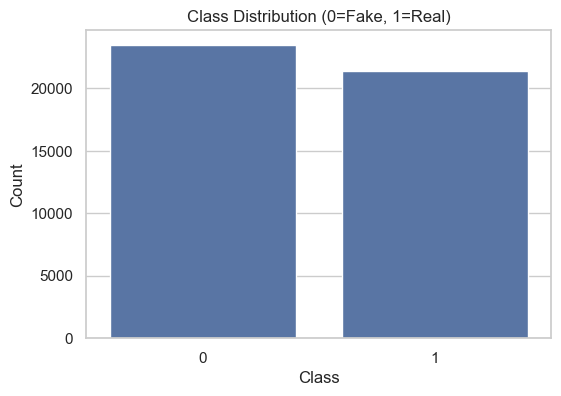

In [6]:
#EDA
print("\nData Types and Info: ")
df.info()

print("\nMissing Value Count: ")
print(df.isnull().sum())

print("\nClass Balance: ")
print(df["class"].value_counts())

#class balance
plt.figure(figsize=(6, 4))
sns.countplot(x='class', data=df)
plt.title("Class Distribution (0=Fake, 1=Real)")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

<font size="5">Data Cleaning</font>

In [7]:
print("Data Cleaning: ")
print(f"Initial row count: {len(df)}")

# Check for duplicates
dup_count = df.duplicated(subset=['text']).sum()
print(f"Found {dup_count} duplicate rows.")

# Remove duplicates
df.drop_duplicates(subset=['text'], inplace=True)
print(f"Row count after dropping duplicates: {len(df)}")

Data Cleaning: 
Initial row count: 44898
Found 6252 duplicate rows.
Row count after dropping duplicates: 38646


In [8]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'<.*?>+', '', text)
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub(r'\n', '', text)
    text = re.sub(r'\w*\d\w*', '', text)
    return text

df["text"] = df["text"].apply(clean_text)
print("Text cleaning complete.")

#Splitting dataset into train, test and validate.
print("Train/Validation/Test Split (70/15/15)")
X = df["text"]
y = df["class"]

#Split into test and non test dataset.
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, 
                                                            test_size=0.15, 
                                                            random_state=42, 
                                                            stratify=y)

#splitting the not test dataset to train and validate.
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, 
                                                  test_size=(15/85), 
                                                  random_state=42, 
                                                  stratify=y_train_val)

print(f"Total examples: {len(X)}")
print(f"Training examples: {len(X_train)} (~{len(X_train)/len(X)*100:.0f}%)")
print(f"Validation examples: {len(X_val)} (~{len(X_val)/len(X)*100:.0f}%)")
print(f"Test examples: {len(X_test)} (~{len(X_test)/len(X)*100:.0f}%)")


Text cleaning complete.
Train/Validation/Test Split (70/15/15)
Total examples: 38646
Training examples: 27052 (~70%)
Validation examples: 5797 (~15%)
Test examples: 5797 (~15%)


In [9]:
#TF-IDF Vectorization
print("\nTF-IDF Vectorization: ")
vectorizer = TfidfVectorizer()
xv_train = vectorizer.fit_transform(X_train)
xv_val = vectorizer.transform(X_val)
xv_test = vectorizer.transform(X_test)
print("Vectorization complete.")
print(f"Vocabulary size: {len(vectorizer.get_feature_names_out())} words")

#Saving the cleaned dataset
df.to_csv('cleaned_news_dataset.csv', index=False)
print("Cleaned dataset saved to 'cleaned_news_dataset.csv'")



TF-IDF Vectorization: 
Vectorization complete.
Vocabulary size: 158839 words
Cleaned dataset saved to 'cleaned_news_dataset.csv'


In [10]:
dlf = pd.read_csv('cleaned_news_dataset.csv')

In [11]:
dlf.head()

,text,class
0,donald trump just couldn t wish all americans ...,0
1,house intelligence committee chairman devin nu...,0
2,on friday it was revealed that former milwauke...,0
3,on christmas day donald trump announced that h...,0
4,pope francis used his annual christmas day mes...,0


In [12]:
dlf.tail()

,text,class
38641,brussels reuters nato allies on tuesday welco...,1
38642,london reuters lexisnexis a provider of legal...,1
38643,minsk reuters in the shadow of disused soviet...,1
38644,moscow reuters vatican secretary of state car...,1
38645,jakarta reuters indonesia will buy sukhoi fi...,1


In [13]:
dlf

,text,class
0,donald trump just couldn t wish all americans ...,0
1,house intelligence committee chairman devin nu...,0
2,on friday it was revealed that former milwauke...,0
3,on christmas day donald trump announced that h...,0
4,pope francis used his annual christmas day mes...,0
...,...,...
38641,brussels reuters nato allies on tuesday welco...,1
38642,london reuters lexisnexis a provider of legal...,1
38643,minsk reuters in the shadow of disused soviet...,1
38644,moscow reuters vatican secretary of state car...,1


In [14]:


try:
    df_fake = pd.read_csv("Fake.csv")
    df_true = pd.read_csv("True.csv")
    
    df = pd.concat([df_fake, df_true], axis=0).reset_index(drop=True)

    print("REAL DATA DEMO")

    row_to_check = 5

    before_text = df.loc[row_to_check]['text']
    
    after_text = clean_text(before_text)

    print(f"SHOWING ROW: {row_to_check}")
    
    print("\nBEFORE CLEANING: ")
    print(before_text)
    
    
    print("\nAFTER CLEANING")
    print(after_text)

except FileNotFoundError:
    print("Skipping 'Real Data Demo' because 'Fake.csv' or 'True.csv' were not found.")

REAL DATA DEMO
SHOWING ROW: 5

BEFORE CLEANING: 
The number of cases of cops brutalizing and killing people of color seems to see no end. Now, we have another case that needs to be shared far and wide. An Alabama woman by the name of Angela Williams shared a graphic photo of her son, lying in a hospital bed with a beaten and fractured face, on Facebook. It needs to be shared far and wide, because this is unacceptable.It is unclear why Williams  son was in police custody or what sort of altercation resulted in his arrest, but when you see the photo you will realize that these details matter not. Cops are not supposed to beat and brutalize those in their custody. In the post you are about to see, Ms. Williams expresses her hope that the cops had their body cameras on while they were beating her son, but I think we all know that there will be some kind of convenient  malfunction  to explain away the lack of existence of dash or body camera footage of what was clearly a brutal beating. Hel

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report, 
    accuracy_score, 
    confusion_matrix, 
    RocCurveDisplay,
    roc_auc_score
)

In [16]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Multinomial Naive Bayes": MultinomialNB(),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Linear SVM": LinearSVC(random_state=42, max_iter=2000)}

In [17]:
baseline_results = {}

for name, model in models.items():
    print(f"\nTraining {name}")
    model.fit(xv_train, y_train)
    
    y_pred_val = model.predict(xv_val)
    
    accuracy = accuracy_score(y_val, y_pred_val)
    report_str = classification_report(y_val, y_pred_val)
    
    baseline_results[name] = {
        'model': model,
        'accuracy': accuracy,
        'report_str': report_str,
        'predictions': y_pred_val
    }
    
    print(f"Validation Accuracy: {accuracy:.4f}")
    print("Validation Classification Report:")
    print(report_str)



Training Logistic Regression
Validation Accuracy: 0.9850
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      2618
           1       0.98      0.99      0.99      3179

    accuracy                           0.98      5797
   macro avg       0.99      0.98      0.98      5797
weighted avg       0.99      0.98      0.98      5797


Training Decision Tree
Validation Accuracy: 0.9945
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2618
           1       0.99      1.00      0.99      3179

    accuracy                           0.99      5797
   macro avg       0.99      0.99      0.99      5797
weighted avg       0.99      0.99      0.99      5797


Training Multinomial Naive Bayes
Validation Accuracy: 0.9260
Validation Classification Report:
              precision    recall  f1-score   support

           0     

In [18]:
from sklearn.metrics import f1_score

final_comparison_list = []

print("FINAL MODEL EVALUATION (Validation vs. Test)")
print("Running all 6 models on the unseen Test Set...")

for name, result in baseline_results.items():
    
    model = result['model']
    validation_accuracy = result['accuracy']

    y_pred_test = model.predict(xv_test)
    
    test_accuracy = accuracy_score(y_test, y_pred_test)
    test_f1 = f1_score(y_test, y_pred_test, average='weighted')
    
    final_comparison_list.append({
        'Model': name,
        'Validation Accuracy': validation_accuracy,
        'Test Accuracy': test_accuracy,
        'Test F1 (Weighted)': test_f1
    })

df_final_comparison = pd.DataFrame(final_comparison_list)
df_final_comparison = df_final_comparison.sort_values(by='Test Accuracy', ascending=False)

print("\n")
print("FINAL PERFORMANCE METRICS: VALIDATION vs. TEST")
print(df_final_comparison.to_string(index=False))
print("\n")

best_model_name = df_final_comparison.iloc[0]['Model']
best_model = baseline_results[best_model_name]['model']

print(f"Detailed Report for BEST Model ({best_model_name}) on TEST SET")
y_pred_best = best_model.predict(xv_test)
final_report_str = classification_report(y_test, y_pred_best, target_names=['Fake (0)', 'Real (1)'])
print(final_report_str)

FINAL MODEL EVALUATION (Validation vs. Test)
Running all 6 models on the unseen Test Set...


FINAL PERFORMANCE METRICS: VALIDATION vs. TEST
                  Model  Validation Accuracy  Test Accuracy  Test F1 (Weighted)
          Decision Tree             0.994480       0.994307            0.994306
             Linear SVM             0.993100       0.990167            0.990163
    Logistic Regression             0.984992       0.980852            0.980834
          Random Forest             0.976885       0.973090            0.973050
Multinomial Naive Bayes             0.925996       0.919959            0.919306
                    KNN             0.624116       0.627048            0.591052


Detailed Report for BEST Model (Decision Tree) on TEST SET
              precision    recall  f1-score   support

    Fake (0)       1.00      0.99      0.99      2618
    Real (1)       0.99      1.00      0.99      3179

    accuracy                           0.99      5797
   macro avg       0

1. Comparative ROC-AUC Curve (on TEST Set)


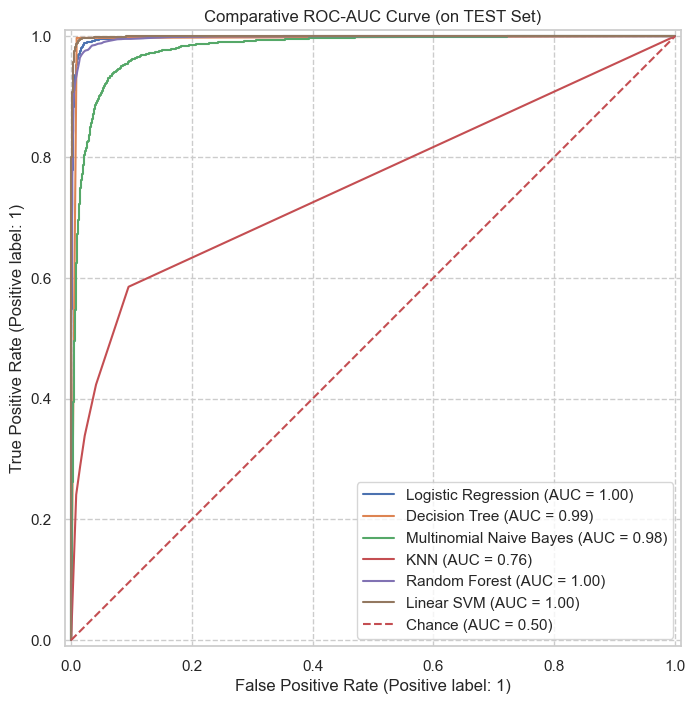

In [19]:
print("1. Comparative ROC-AUC Curve (on TEST Set)")

fig, ax = plt.subplots(figsize=(10, 8))

for name, result in baseline_results.items():
    model = result['model']
    
    if hasattr(model, "predict_proba"):
        RocCurveDisplay.from_estimator(model, xv_test, y_test, name=name, ax=ax)
    elif hasattr(model, "decision_function"):
        RocCurveDisplay.from_estimator(model, xv_test, y_test, name=name, ax=ax)
    else:
        print(f"Skipping ROC curve for {name}")

ax.plot([0, 1], [0, 1], 'r--', label='Chance (AUC = 0.50)')
plt.title('Comparative ROC-AUC Curve (on TEST Set)')
plt.legend(loc='lower right')
plt.grid(linestyle='--')
plt.show()

In [20]:
from sklearn.metrics import RocCurveDisplay, confusion_matrix


2. Confusion Matrices for All Models (on TEST Set)


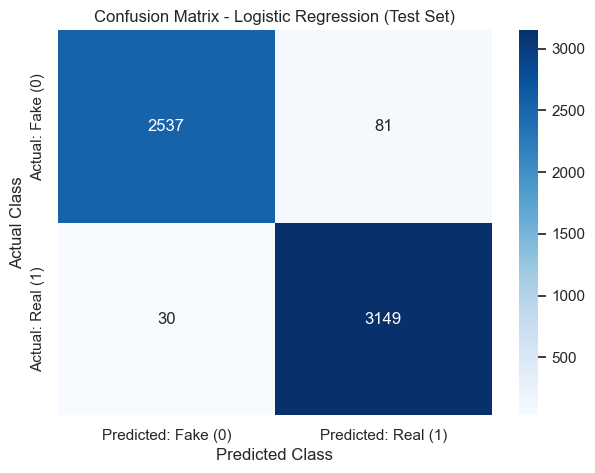

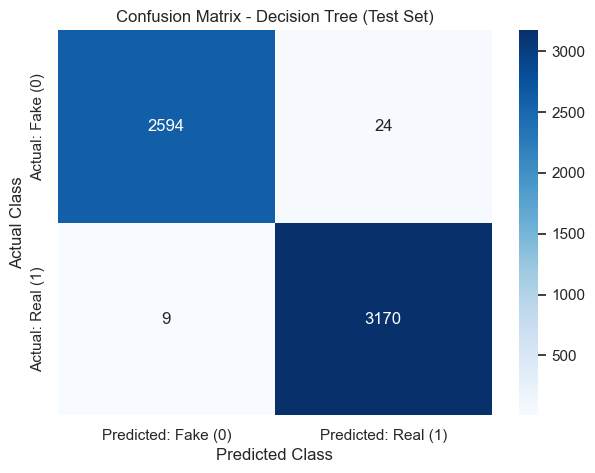

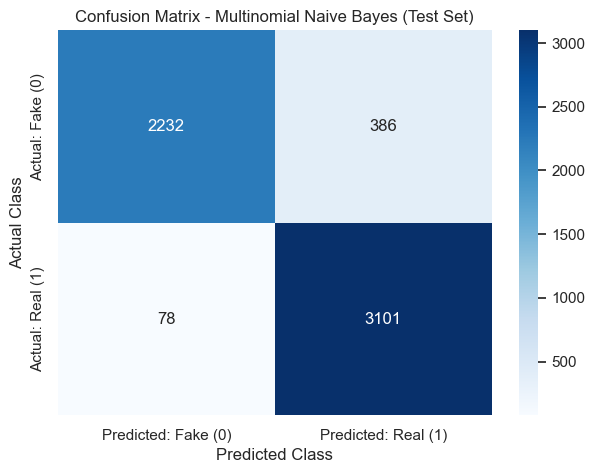

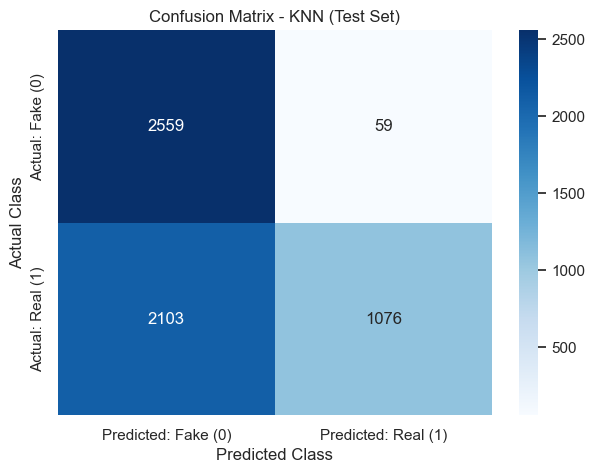

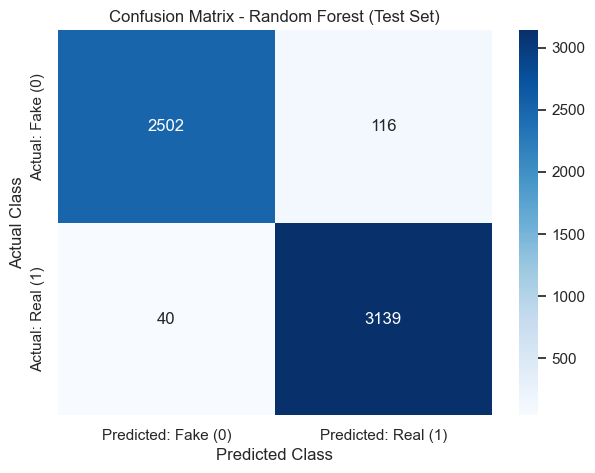

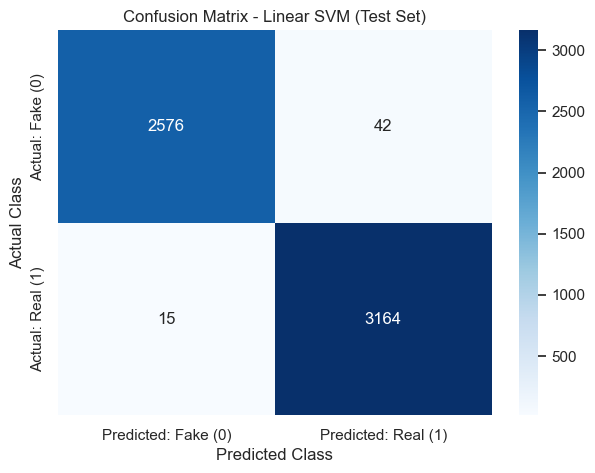

In [21]:
print("\n2. Confusion Matrices for All Models (on TEST Set)")

for name, result in baseline_results.items():
        model = result['model']
    
        y_pred_test = model.predict(xv_test)
    
        cm_model = confusion_matrix(y_test, y_pred_test)
    
        plt.figure(figsize=(7, 5))
        sns.heatmap(cm_model, 
                annot=True, 
                fmt='d', 
                cmap='Blues', 
                xticklabels=['Predicted: Fake (0)', 'Predicted: Real (1)'], 
                yticklabels=['Actual: Fake (0)', 'Actual: Real (1)'])
        plt.title(f'Confusion Matrix - {name} (Test Set)')
        plt.ylabel('Actual Class')
        plt.xlabel('Predicted Class')
        plt.show()

Starting hyperparameter tuning for 5 models...
(This may take 5-10 minutes, especially for Random Forest...)

--- Tuning Logistic Regression ---
Fitting 3 folds for each of 3 candidates, totalling 9 fits
Best parameters found: {'C': 10, 'solver': 'liblinear'}

--- Tuning Decision Tree ---
Fitting 3 folds for each of 9 candidates, totalling 27 fits
Best parameters found: {'max_depth': 20, 'min_samples_split': 2}

--- Tuning Multinomial Naive Bayes ---
Fitting 3 folds for each of 3 candidates, totalling 9 fits
Best parameters found: {'alpha': 0.1}

--- Skipping KNN (useless) ---

--- Tuning Random Forest ---
Fitting 3 folds for each of 4 candidates, totalling 12 fits
Best parameters found: {'max_depth': None, 'n_estimators': 150}

--- Tuning Linear SVM ---
Fitting 3 folds for each of 3 candidates, totalling 9 fits
Best parameters found: {'C': 10, 'dual': True, 'max_iter': 2000}

Hyperparameter tuning complete!

--- Performance Comparison: Baseline vs. Tuned ---


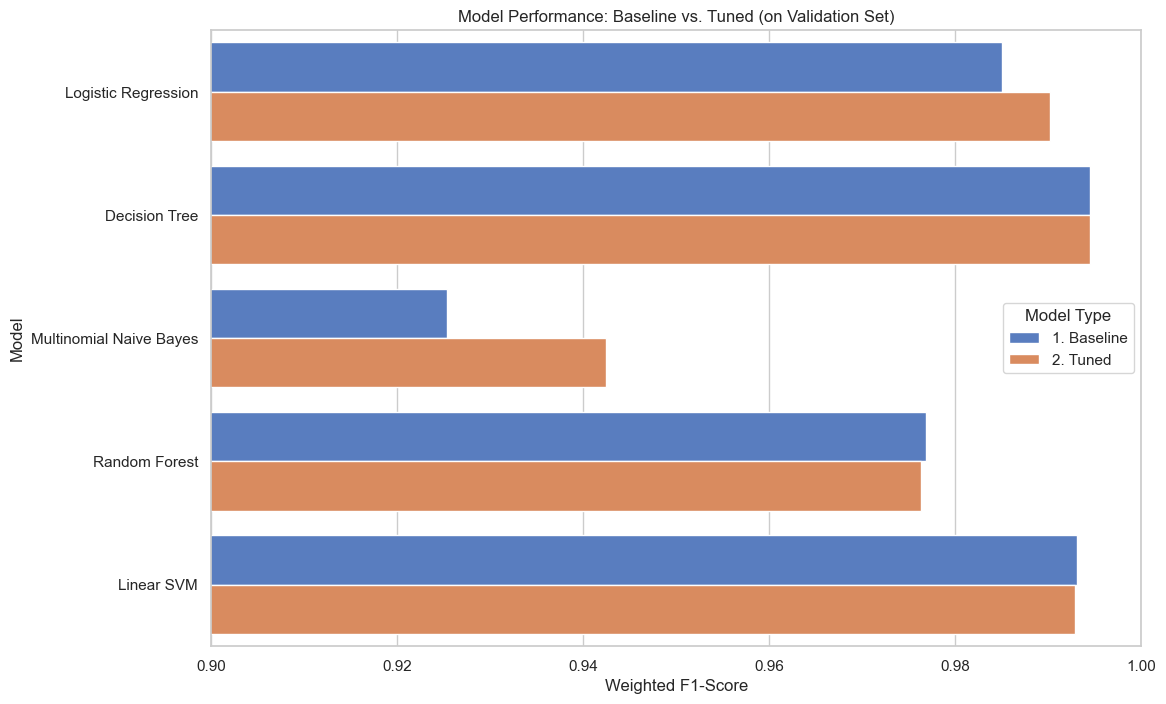


--- Final Tuned Model Scores ---
Score Type               1. Baseline  2. Tuned
Model                                         
Decision Tree               0.994480  0.994480
Linear SVM                  0.993098  0.992925
Logistic Regression         0.984983  0.990162
Multinomial Naive Bayes     0.925396  0.942443
Random Forest               0.976857  0.976342
CPU times: total: 4min 53s
Wall time: 10min 49s


In [22]:
%%time

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, accuracy_score
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

param_grids = {
    "Logistic Regression": {
        'C': [0.1, 1.0, 10],
        'solver': ['liblinear']
    },
    "Decision Tree": {
        'max_depth': [None, 20, 30],
        'min_samples_split': [2, 5, 10]
    },
    "Multinomial Naive Bayes": {
        'alpha': [0.1, 0.5, 1.0]
    },
    "Random Forest": {
        'n_estimators': [100, 150],
        'max_depth': [None, 20]
    },
    "Linear SVM": {
        'C': [0.1, 1.0, 10],
        'dual': [True],
        'max_iter': [2000]
    }
}

tuned_results = {}

print("Starting hyperparameter tuning for 5 models...")
print("(This may take 5-10 minutes, especially for Random Forest...)")

for name, model in models.items():
    if name == "KNN":
        print("\n--- Skipping KNN (useless) ---")
        continue

    print(f"\n--- Tuning {name} ---")
    
    grid = param_grids[name]
    
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=grid,
        cv=3,
        scoring='f1_weighted',
        n_jobs=-1,
        verbose=1
    )
    
    grid_search.fit(xv_train, y_train)
    
    print(f"Best parameters found: {grid_search.best_params_}")
    
    best_model = grid_search.best_estimator_
    
    y_pred_val = best_model.predict(xv_val)
    
    tuned_results[name] = {
        'model': best_model,
        'accuracy': accuracy_score(y_val, y_pred_val),
        'predictions': y_pred_val,
        'f1_score_weighted': f1_score(y_val, y_pred_val, average='weighted')
    }

print("\n" + "="*50)
print("Hyperparameter tuning complete!")
print("\n--- Performance Comparison: Baseline vs. Tuned ---")

comparison_data = []

for name in tuned_results.keys():
    baseline_pred = baseline_results[name]['predictions']
    baseline_f1 = f1_score(y_val, baseline_pred, average='weighted')
    
    tuned_f1 = tuned_results[name]['f1_score_weighted']
    
    comparison_data.append({'Model': name, 'Score Type': '1. Baseline', 'F1-Score': baseline_f1})
    comparison_data.append({'Model': name, 'Score Type': '2. Tuned', 'F1-Score': tuned_f1})

df_comparison = pd.DataFrame(comparison_data)

plt.figure(figsize=(12, 8))
sns.barplot(data=df_comparison, 
            x='F1-Score', 
            y='Model', 
            hue='Score Type', 
            palette='muted')
plt.title("Model Performance: Baseline vs. Tuned (on Validation Set)")
plt.xlabel("Weighted F1-Score")
plt.ylabel("Model")
plt.legend(title='Model Type')
plt.xlim(0.9, 1.0)
plt.show()

print("\n--- Final Tuned Model Scores ---")
print(df_comparison.pivot(index='Model', columns='Score Type', values='F1-Score'))

--- In-Depth Analysis of Tuned Models (on Validation Set) ---

--- Analysis for Tuned Model: Logistic Regression ---

--- Error Metrics (Classification Report) ---
              precision    recall  f1-score   support

    Fake (0)       0.99      0.98      0.99      2618
    Real (1)       0.99      1.00      0.99      3179

    accuracy                           0.99      5797
   macro avg       0.99      0.99      0.99      5797
weighted avg       0.99      0.99      0.99      5797


--- Confusion Matrix ---


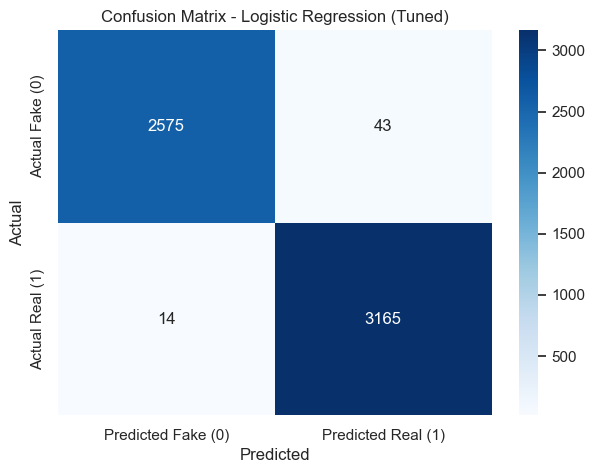


--- Analysis of Errors ---
Total Validation Articles: 5797
Total Correct Predictions: 5740
Total Errors: 57

--- Breakdown of Mistakes ---
False Positives: 43 'Fake' articles were incorrectly labeled as 'Real'. (Worst Error!)
False Negatives: 14 'Real' articles were incorrectly labeled as 'Fake'.

--- Analysis for Tuned Model: Decision Tree ---

--- Error Metrics (Classification Report) ---
              precision    recall  f1-score   support

    Fake (0)       0.99      0.99      0.99      2618
    Real (1)       0.99      1.00      0.99      3179

    accuracy                           0.99      5797
   macro avg       0.99      0.99      0.99      5797
weighted avg       0.99      0.99      0.99      5797


--- Confusion Matrix ---


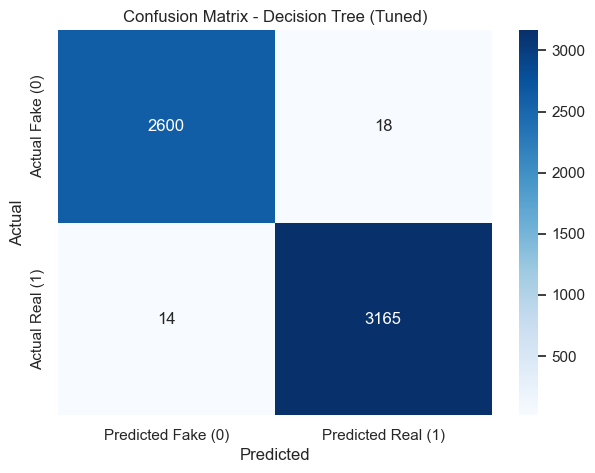


--- Analysis of Errors ---
Total Validation Articles: 5797
Total Correct Predictions: 5765
Total Errors: 32

--- Breakdown of Mistakes ---
False Positives: 18 'Fake' articles were incorrectly labeled as 'Real'. (Worst Error!)
False Negatives: 14 'Real' articles were incorrectly labeled as 'Fake'.

--- Analysis for Tuned Model: Multinomial Naive Bayes ---

--- Error Metrics (Classification Report) ---
              precision    recall  f1-score   support

    Fake (0)       0.95      0.92      0.94      2618
    Real (1)       0.93      0.96      0.95      3179

    accuracy                           0.94      5797
   macro avg       0.94      0.94      0.94      5797
weighted avg       0.94      0.94      0.94      5797


--- Confusion Matrix ---


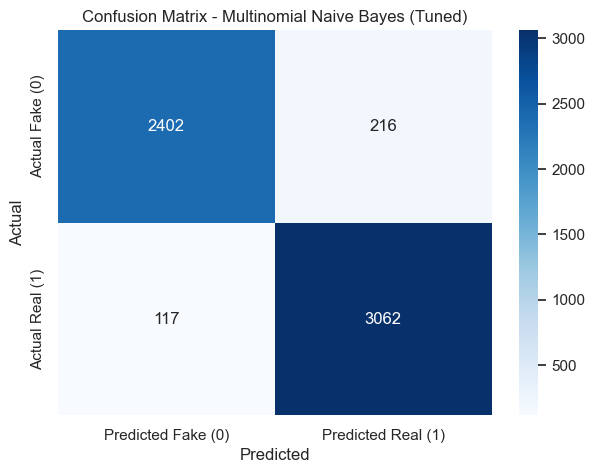


--- Analysis of Errors ---
Total Validation Articles: 5797
Total Correct Predictions: 5464
Total Errors: 333

--- Breakdown of Mistakes ---
False Positives: 216 'Fake' articles were incorrectly labeled as 'Real'. (Worst Error!)
False Negatives: 117 'Real' articles were incorrectly labeled as 'Fake'.

--- Analysis for Tuned Model: Random Forest ---

--- Error Metrics (Classification Report) ---
              precision    recall  f1-score   support

    Fake (0)       0.98      0.96      0.97      2618
    Real (1)       0.97      0.99      0.98      3179

    accuracy                           0.98      5797
   macro avg       0.98      0.98      0.98      5797
weighted avg       0.98      0.98      0.98      5797


--- Confusion Matrix ---


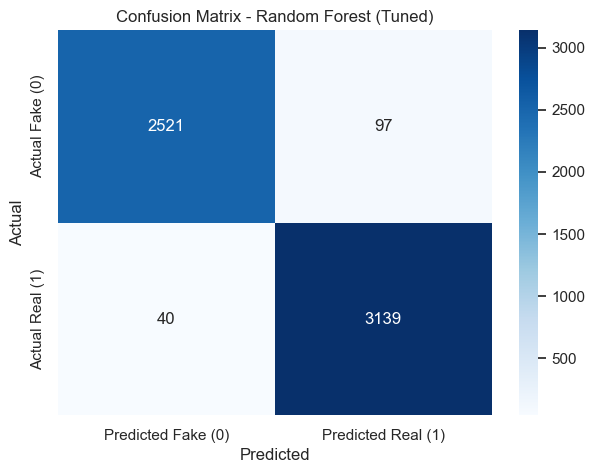


--- Analysis of Errors ---
Total Validation Articles: 5797
Total Correct Predictions: 5660
Total Errors: 137

--- Breakdown of Mistakes ---
False Positives: 97 'Fake' articles were incorrectly labeled as 'Real'. (Worst Error!)
False Negatives: 40 'Real' articles were incorrectly labeled as 'Fake'.

--- Analysis for Tuned Model: Linear SVM ---

--- Error Metrics (Classification Report) ---
              precision    recall  f1-score   support

    Fake (0)       1.00      0.99      0.99      2618
    Real (1)       0.99      1.00      0.99      3179

    accuracy                           0.99      5797
   macro avg       0.99      0.99      0.99      5797
weighted avg       0.99      0.99      0.99      5797


--- Confusion Matrix ---


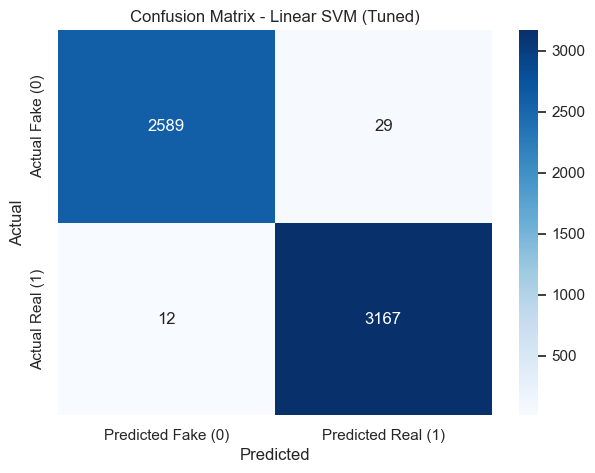


--- Analysis of Errors ---
Total Validation Articles: 5797
Total Correct Predictions: 5756
Total Errors: 41

--- Breakdown of Mistakes ---
False Positives: 29 'Fake' articles were incorrectly labeled as 'Real'. (Worst Error!)
False Negatives: 12 'Real' articles were incorrectly labeled as 'Fake'.

--- End of Tuned Model Analysis ---


In [23]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

print("--- In-Depth Analysis of Tuned Models (on Validation Set) ---")

# We loop through the 'tuned_results' dictionary created in the previous cell
for name, result_data in tuned_results.items():
    
    print("\n" + "="*60)
    print(f"--- Analysis for Tuned Model: {name} ---")
    
    # Get the predictions that were already made on the validation set
    y_pred_val = result_data['predictions']
    
    # --- 1. Error Metrics (The Classification Report) ---
    print("\n--- Error Metrics (Classification Report) ---")
    
    # Use y_val (the true answers) and y_pred_val (the model's guesses)
    report = classification_report(y_val, y_pred_val, target_names=['Fake (0)', 'Real (1)'])
    print(report)
    
    # --- 2. Confusion Matrix ---
    print("\n--- Confusion Matrix ---")
    cm = confusion_matrix(y_val, y_pred_val)
    
    # Plot the heatmap
    plt.figure(figsize=(7, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Predicted Fake (0)', 'Predicted Real (1)'], 
                yticklabels=['Actual Fake (0)', 'Actual Real (1)'])
    plt.title(f"Confusion Matrix - {name} (Tuned)")
    plt.ylabel("Actual")
    plt.xlabel("Predicted")
    plt.show()

    # --- 3. Error Analysis (Human-Readable Summary) ---
    # .ravel() flattens the 2x2 matrix into a 1D array: [TN, FP, FN, TP]
    try:
        tn, fp, fn, tp = cm.ravel()
        
        print("\n--- Analysis of Errors ---")
        print(f"Total Validation Articles: {tn + fp + fn + tp}")
        print(f"Total Correct Predictions: {tn + tp}")
        print(f"Total Errors: {fp + fn}")
        
        print("\n--- Breakdown of Mistakes ---")
        print(f"False Positives: {fp} 'Fake' articles were incorrectly labeled as 'Real'. (Worst Error!)")
        print(f"False Negatives: {fn} 'Real' articles were incorrectly labeled as 'Fake'.")
        
    except ValueError:
        print("Could not unpack Confusion Matrix. Model may have errors.")

print("\n" + "="*60)
print("--- End of Tuned Model Analysis ---")

Starting RandomizedSearchCV for 5 models (10 iterations each)...
(This may take several minutes...)

--- Tuning Logistic Regression ---
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best parameters found: {'C': 9.60714306409916, 'solver': 'liblinear'}

--- Tuning Decision Tree ---
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best parameters found: {'max_depth': 30, 'min_samples_leaf': 10, 'min_samples_split': 7}

--- Tuning Multinomial Naive Bayes ---
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best parameters found: {'alpha': 0.06808361216819946}

--- Skipping KNN (useless) ---

--- Tuning Random Forest ---
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best parameters found: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'min_samples_split': 4, 'n_estimators': 207}

--- Tuning Linear SVM ---
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best parameters found: {'C': 8.761761457749351, 'du

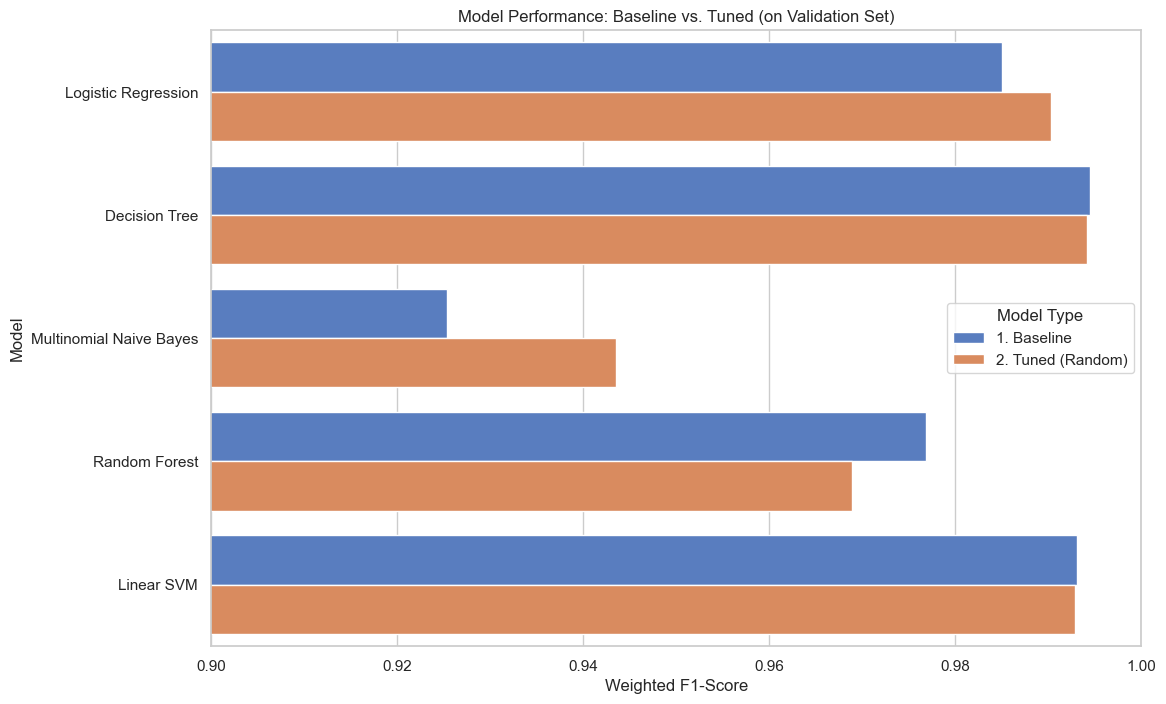


--- Final Tuned Model Scores ---
Score Type               1. Baseline  2. Tuned (Random)
Model                                                  
Decision Tree               0.994480           0.994135
Linear SVM                  0.993098           0.992925
Logistic Regression         0.984983           0.990335
Multinomial Naive Bayes     0.925396           0.943498
Random Forest               0.976857           0.968897
CPU times: total: 1min 59s
Wall time: 6min 18s


In [24]:
%%time
# This "magic command" will time how long the whole cell takes to run.

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform # We use these to define ranges
from sklearn.metrics import f1_score, accuracy_score
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ---
# STEP 1: DEFINE THE "PARAMETER DISTRIBUTIONS" (RANGES)
# ---
param_dists = {
    "Logistic Regression": {
        'C': uniform(0.1, 10), # Any value between 0.1 and 10.1
        'solver': ['liblinear']
    },
    "Decision Tree": {
        'max_depth': [None, 10, 20, 30, 40, 50], # Specific values to try
        'min_samples_split': randint(2, 11), # Any integer from 2 to 10
        'min_samples_leaf': randint(1, 11)   # Any integer from 1 to 10
    },
    "Multinomial Naive Bayes": {
        'alpha': uniform(0.01, 1.0) # Any value between 0.01 and 1.01
    },
    "Random Forest": {
        'n_estimators': randint(100, 300),
        'max_depth': [None, 10, 20, 30, 40],
        'min_samples_split': randint(2, 11),
        'min_samples_leaf': randint(1, 11),
        'max_features': ['sqrt', 'log2']
    },
    "Linear SVM": {
        'C': uniform(0.1, 10), # Any value between 0.1 and 10.1
        'dual': [True],
        'max_iter': [2000]
    }
}

# We will store our new, tuned models and results here
tuned_results_random = {}

# We'll run 10 iterations for each model.
# Increase 'n_iter' (e.g., to 25 or 50) for a more thorough search.
N_ITERATIONS = 10 

print(f"Starting RandomizedSearchCV for 5 models ({N_ITERATIONS} iterations each)...")
print("(This may take several minutes...)")

# ---
# STEP 2: LOOP THROUGH AND TUNE THE MODELS
# ---
for name, model in models.items():
    if name == "KNN":
        print("\n--- Skipping KNN (useless) ---")
        continue

    print(f"\n--- Tuning {name} ---")
    
    # Get the parameter grid for this model
    dist = param_dists[name]
    
    random_search = RandomizedSearchCV(
        estimator=model,
        param_distributions=dist,
        n_iter=N_ITERATIONS,
        cv=3,
        scoring='f1_weighted',
        n_jobs=-1,
        verbose=1,
        random_state=42 # for reproducible results
    )
    
    # Run the tuning on the TRAINING data
    random_search.fit(xv_train, y_train)
    
    print(f"Best parameters found: {random_search.best_params_}")
    
    # Get the best, new, tuned model
    best_model = random_search.best_estimator_
    
    # ---
    # STEP 3: EVALUATE THE NEW TUNED MODEL ON THE *VALIDATION* SET
    # ---
    y_pred_val = best_model.predict(xv_val)
    
    # Store the new results
    tuned_results_random[name] = {
        'model': best_model,
        'accuracy': accuracy_score(y_val, y_pred_val),
        'predictions': y_pred_val,
        'f1_score_weighted': f1_score(y_val, y_pred_val, average='weighted')
    }

print("\n" + "="*50)
print("Hyperparameter tuning complete!")


# ---
# STEP 4: VISUALIZE THE COMPARISON (BASELINE VS. TUNED)
# ---
print("\n--- Performance Comparison: Baseline vs. Random-Tuned ---")

comparison_data_random = []

for name in tuned_results_random.keys():
    # Get the baseline F1 score
    baseline_pred = baseline_results[name]['predictions']
    baseline_f1 = f1_score(y_val, baseline_pred, average='weighted')
    
    # Get the new tuned F1 score
    tuned_f1 = tuned_results_random[name]['f1_score_weighted']
    
    comparison_data_random.append({'Model': name, 'Score Type': '1. Baseline', 'F1-Score': baseline_f1})
    comparison_data_random.append({'Model': name, 'Score Type': '2. Tuned (Random)', 'F1-Score': tuned_f1})

# Convert to a DataFrame for easy plotting
df_comparison_random = pd.DataFrame(comparison_data_random)

plt.figure(figsize=(12, 8))
sns.barplot(data=df_comparison_random, 
            x='F1-Score', 
            y='Model', 
            hue='Score Type', 
            palette='muted')
plt.title("Model Performance: Baseline vs. Tuned (on Validation Set)")
plt.xlabel("Weighted F1-Score")
plt.ylabel("Model")
plt.legend(title='Model Type')
plt.xlim(0.9, 1.0) # Zoom in on the 90-100% range
plt.show()

print("\n--- Final Tuned Model Scores ---")
print(df_comparison_random.pivot(index='Model', columns='Score Type', values='F1-Score'))


1. Logistic Regression Interpretation(RandomSearchCV): 


C:\Users\subha\AppData\Local\Temp\ipykernel_21536\1529072040.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='coef', y='word', data=df_fake, ax=axes[0], palette='Reds_r')
C:\Users\subha\AppData\Local\Temp\ipykernel_21536\1529072040.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='coef', y='word', data=df_real, ax=axes[1], palette='Greens_r')


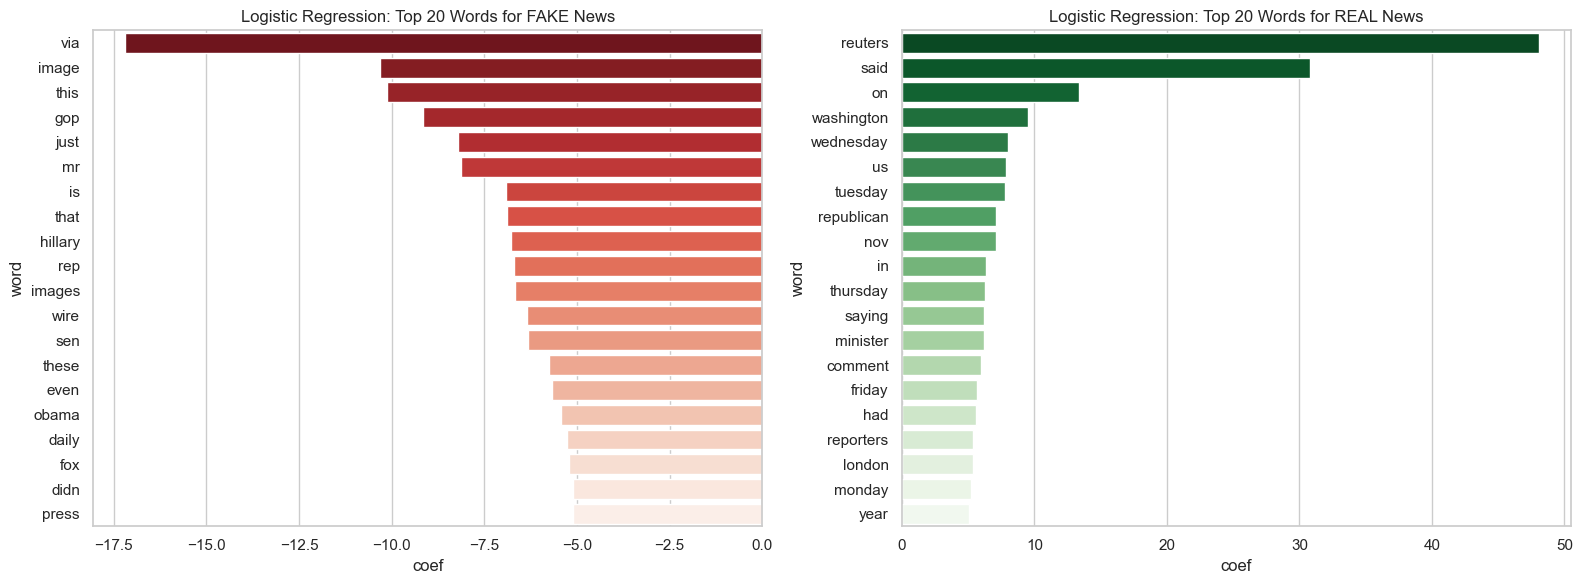


2. Linear SVM Interpretation(Baseline): 


C:\Users\subha\AppData\Local\Temp\ipykernel_21536\1529072040.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='coef', y='word', data=df_fake, ax=axes[0], palette='Reds_r')
C:\Users\subha\AppData\Local\Temp\ipykernel_21536\1529072040.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='coef', y='word', data=df_real, ax=axes[1], palette='Greens_r')


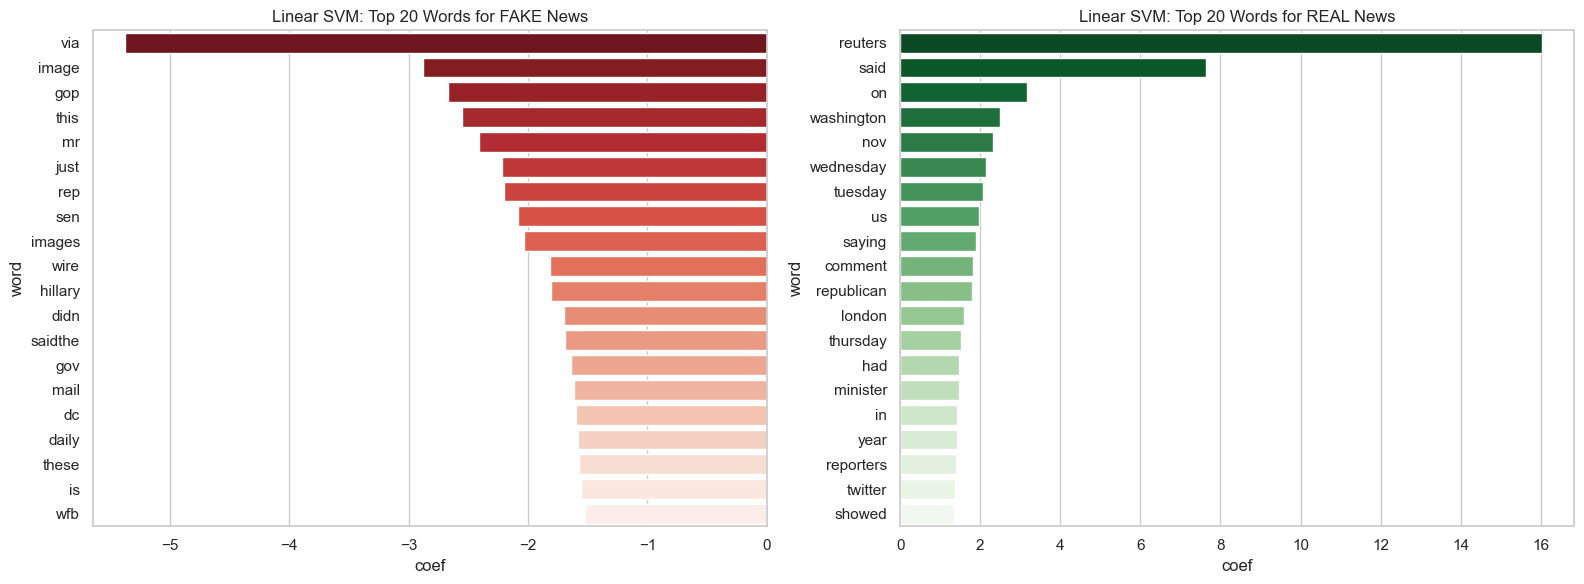


3. Multinomial Naive Bayes Interpretation(RandomSearchCV): 


C:\Users\subha\AppData\Local\Temp\ipykernel_21536\1529072040.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='score', y='word', data=df_fake, ax=axes[0], palette='Reds_r')
C:\Users\subha\AppData\Local\Temp\ipykernel_21536\1529072040.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='score', y='word', data=df_real, ax=axes[1], palette='Greens_r')


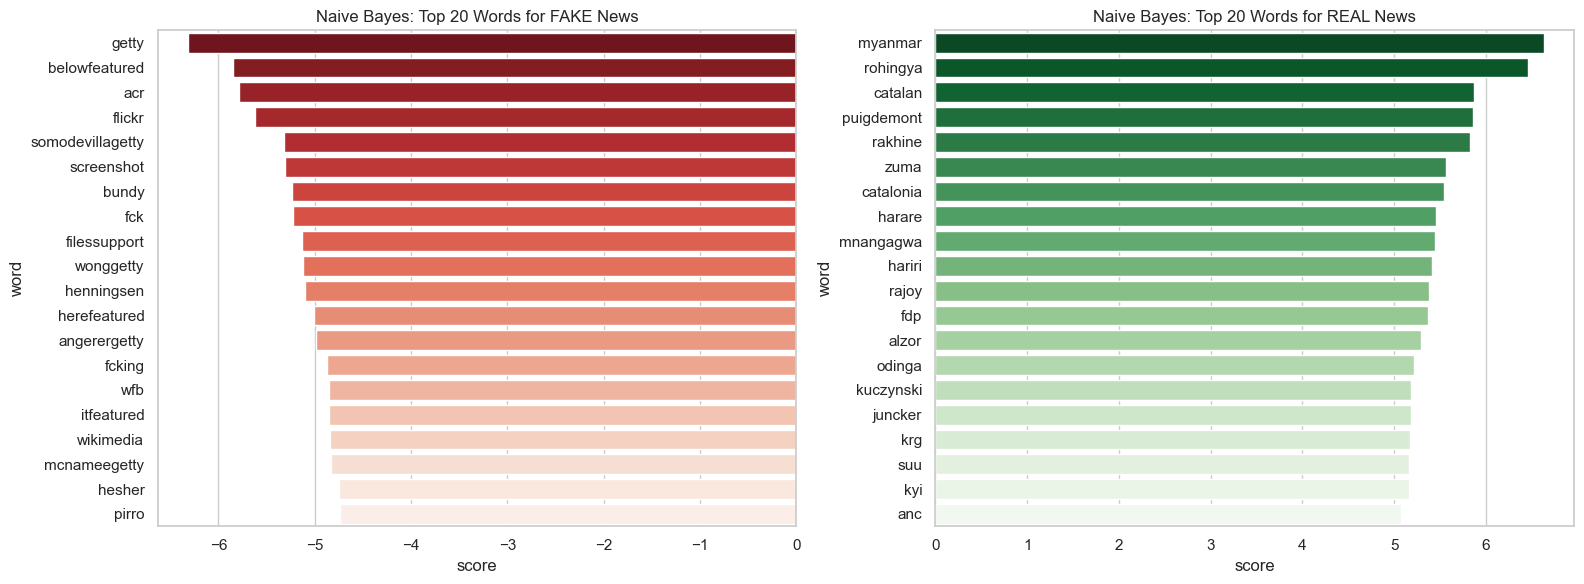


4. Random Forest Feature Importance(GridSearchCV): 


C:\Users\subha\AppData\Local\Temp\ipykernel_21536\1529072040.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='word', data=df_top, palette='viridis')


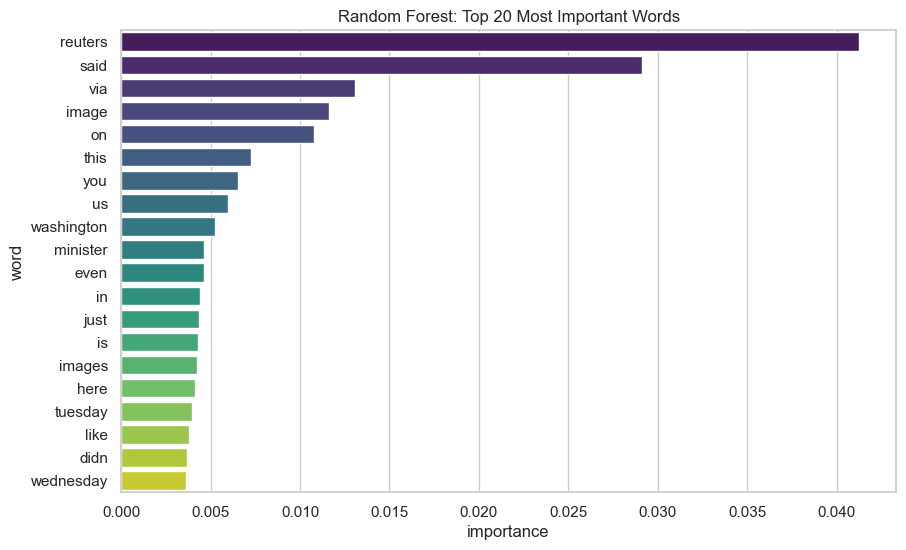


5. Decision Tree Logic Visualization(GridSearchCV): 


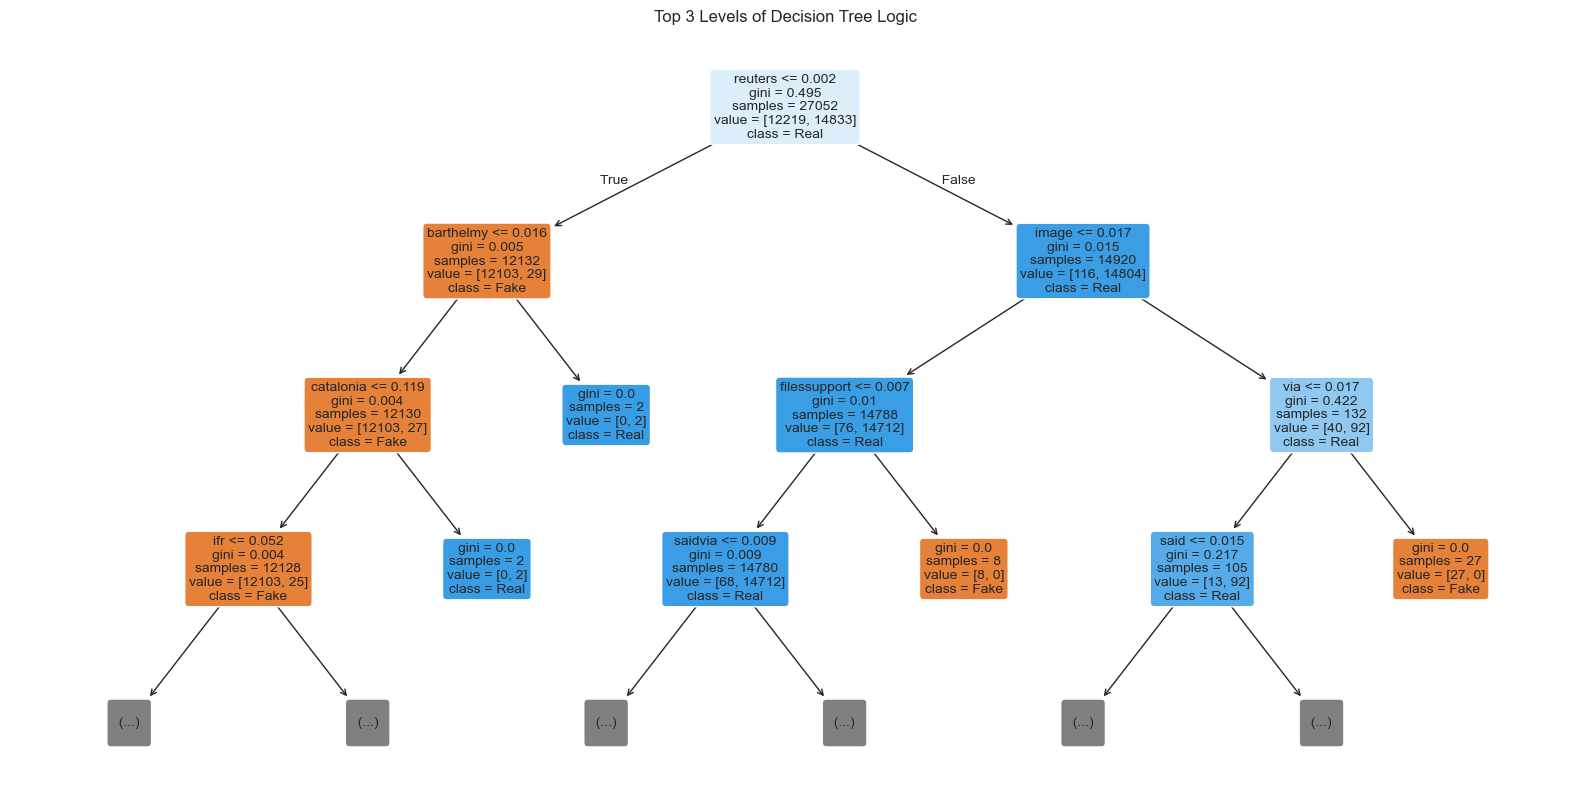

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.tree import plot_tree

def plot_feature_importance_linear(model, vectorizer, top_n=20, model_name="Linear Model"):
    feature_names = vectorizer.get_feature_names_out()
    if hasattr(model, 'coef_'):
        coefs = model.coef_.flatten()
    else:
        print(f"Model {model_name} does not have coefficients.")
        return

    df_feats = pd.DataFrame({'word': feature_names, 'coef': coefs})
    df_fake = df_feats.sort_values(by='coef').head(top_n)
    df_real = df_feats.sort_values(by='coef', ascending=False).head(top_n)
    
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    sns.barplot(x='coef', y='word', data=df_fake, ax=axes[0], palette='Reds_r')
    axes[0].set_title(f'{model_name}: Top {top_n} Words for FAKE News')
    sns.barplot(x='coef', y='word', data=df_real, ax=axes[1], palette='Greens_r')
    axes[1].set_title(f'{model_name}: Top {top_n} Words for REAL News')
    plt.tight_layout()
    plt.show()

def plot_feature_importance_tree(model, vectorizer, top_n=20, model_name="Tree Model"):
    feature_names = vectorizer.get_feature_names_out()
    importances = model.feature_importances_
    df_feats = pd.DataFrame({'word': feature_names, 'importance': importances})
    df_top = df_feats.sort_values(by='importance', ascending=False).head(top_n)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x='importance', y='word', data=df_top, palette='viridis')
    plt.title(f'{model_name}: Top {top_n} Most Important Words')
    plt.show()

def plot_feature_importance_mnb(model, vectorizer, top_n=20):
    feature_names = vectorizer.get_feature_names_out()
    log_prob_fake = model.feature_log_prob_[0, :]
    log_prob_real = model.feature_log_prob_[1, :]
    importance_scores = log_prob_real - log_prob_fake

    df_feats = pd.DataFrame({'word': feature_names, 'score': importance_scores})
    df_fake = df_feats.sort_values(by='score').head(top_n)
    df_real = df_feats.sort_values(by='score', ascending=False).head(top_n)
    
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    sns.barplot(x='score', y='word', data=df_fake, ax=axes[0], palette='Reds_r')
    axes[0].set_title(f'Naive Bayes: Top {top_n} Words for FAKE News')
    sns.barplot(x='score', y='word', data=df_real, ax=axes[1], palette='Greens_r')
    axes[1].set_title(f'Naive Bayes: Top {top_n} Words for REAL News')
    plt.tight_layout()
    plt.show()

if 'Logistic Regression' in tuned_results_random:
    print("\n1. Logistic Regression Interpretation(RandomSearchCV): ")
    best_logreg = tuned_results_random['Logistic Regression']['model']
    plot_feature_importance_linear(best_logreg, vectorizer, model_name="Logistic Regression")

if 'Linear SVM' in baseline_results:
    print("\n2. Linear SVM Interpretation(Baseline): ")
    best_svm = baseline_results['Linear SVM']['model']
    plot_feature_importance_linear(best_svm, vectorizer, model_name="Linear SVM")

if 'Multinomial Naive Bayes' in tuned_results_random:
    print("\n3. Multinomial Naive Bayes Interpretation(RandomSearchCV): ")
    best_mnb = tuned_results_random['Multinomial Naive Bayes']['model']
    plot_feature_importance_mnb(best_mnb, vectorizer)

if 'Random Forest' in tuned_results:
    print("\n4. Random Forest Feature Importance(GridSearchCV): ")
    best_rf = tuned_results['Random Forest']['model']
    plot_feature_importance_tree(best_rf, vectorizer, model_name="Random Forest")

if 'Decision Tree' in tuned_results:
    print("\n5. Decision Tree Logic Visualization(GridSearchCV): ")
    best_dt = tuned_results['Decision Tree']['model']
    
    plt.figure(figsize=(20, 10))
    plot_tree(best_dt, 
              feature_names=vectorizer.get_feature_names_out(), 
              class_names=['Fake', 'Real'], 
              filled=True, rounded=True, max_depth=3, fontsize=10)
    plt.title("Top 3 Levels of Decision Tree Logic")
    plt.show()

In [51]:
tuned_models = {
    "Logistic Regression (RandomSearch)": best_logreg,
    "Linear SVM (Baseline)": best_svm,
    "Multinomial NB (RandomSearch)": best_mnb,
    "Random Forest (GridSearch)": best_rf,
    "Decision Tree (GridSearch)": best_dt
}

print("Tuned Models Loaded:")
for k in tuned_models:
    print(" -", k)


Tuned Models Loaded:
 - Logistic Regression (RandomSearch)
 - Linear SVM (Baseline)
 - Multinomial NB (RandomSearch)
 - Random Forest (GridSearch)
 - Decision Tree (GridSearch)


In [52]:
final_results = {}

for name, model in models.items():
    y_pred = model.predict(xv_val)
    final_results[f"{name} (Baseline)"] = {
        "model": model,
        "y_pred": y_pred,
        "accuracy": accuracy_score(y_val, y_pred),
        "precision": precision_score(y_val, y_pred, average="weighted", zero_division=0),
        "recall": recall_score(y_val, y_pred, average="weighted", zero_division=0),
        "f1": f1_score(y_val, y_pred, average="weighted", zero_division=0),
    }

for name, model in tuned_models.items():
    y_pred = model.predict(xv_val)
    final_results[name] = {
        "model": model,
        "y_pred": y_pred,
        "accuracy": accuracy_score(y_val, y_pred),
        "precision": precision_score(y_val, y_pred, average="weighted", zero_division=0),
        "recall": recall_score(y_val, y_pred, average="weighted", zero_division=0),
        "f1": f1_score(y_val, y_pred, average="weighted", zero_division=0),
    }

summary_df = pd.DataFrame([
    {
        "Model": name,
        "Accuracy": entry["accuracy"],
        "Precision": entry["precision"],
        "Recall": entry["recall"],
        "F1": entry["f1"],
    }
    for name, entry in final_results.items()
]).sort_values("F1", ascending=False)

summary_df


,Model,Accuracy,Precision,Recall,F1
1,Decision Tree (Baseline),0.994480,0.994480,0.994480,0.994480
9,Decision Tree (GridSearch),0.994480,0.994480,0.994480,0.994480
5,Linear SVM (Baseline),0.993100,0.993111,0.993100,0.993098
6,Logistic Regression (RandomSearch),0.990340,0.990377,0.990340,0.990335
0,Logistic Regression (Baseline),0.984992,0.985039,0.984992,0.984983
4,Random Forest (Baseline),0.976885,0.977070,0.976885,0.976857
8,Random Forest (GridSearch),0.976367,0.976508,0.976367,0.976342
7,Multinomial NB (RandomSearch),0.943592,0.943816,0.943592,0.943498
2,Multinomial Naive Bayes (Baseline),0.925996,0.930189,0.925996,0.925396
3,KNN (Baseline),0.624116,0.765583,0.624116,0.587240


C:\Users\subha\AppData\Local\Temp\ipykernel_21536\528314554.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=metric_df, x="Accuracy", y="Model", palette="Blues_r")
C:\Users\subha\AppData\Local\Temp\ipykernel_21536\528314554.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=metric_df, x="F1 Score", y="Model", palette="Greens_r")


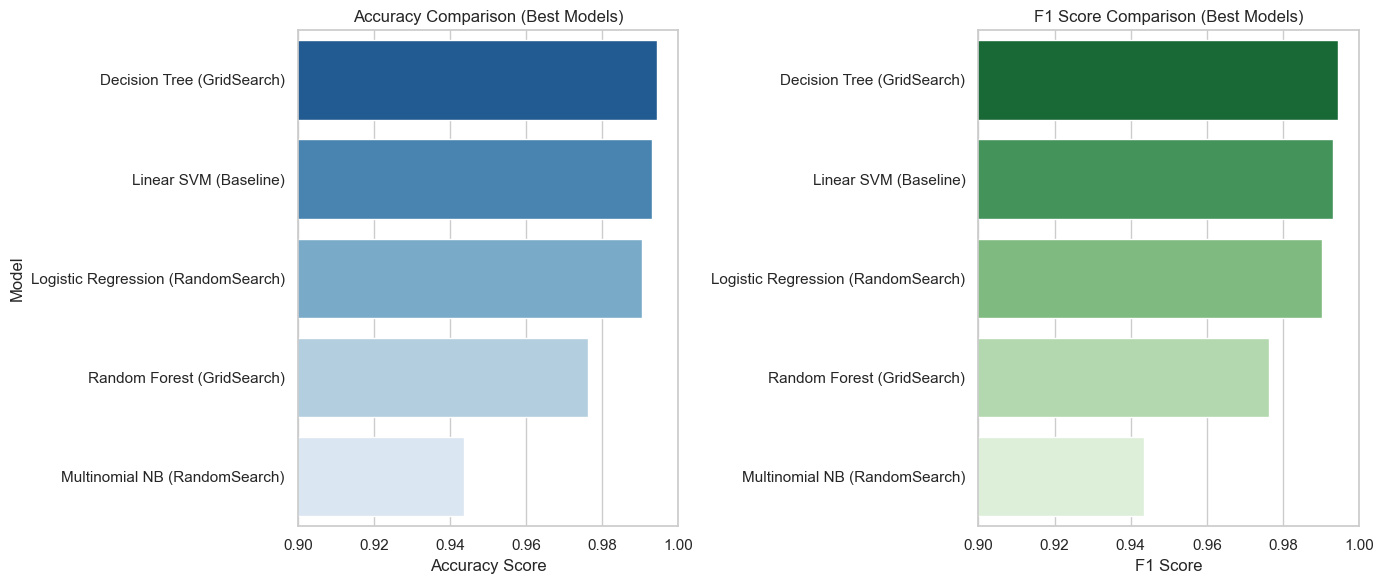

,Model,Accuracy,F1 Score
0,Decision Tree (GridSearch),0.994480,0.994480
1,Linear SVM (Baseline),0.993100,0.993098
2,Logistic Regression (RandomSearch),0.990340,0.990335
3,Random Forest (GridSearch),0.976367,0.976342
4,Multinomial NB (RandomSearch),0.943592,0.943498


In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
metric_df = pd.DataFrame([
    {
        "Model": name,
        "Accuracy": entry["accuracy"],
        "F1 Score": entry["f1"]
    }
    for name, entry in best_results.items()
])

metric_df = metric_df.sort_values("F1 Score", ascending=False).reset_index(drop=True)

plt.figure(figsize=(14,6))

plt.subplot(1, 2, 1)
sns.barplot(data=metric_df, x="Accuracy", y="Model", palette="Blues_r")
plt.title("Accuracy Comparison (Best Models)")
plt.xlim(0.90, 1.00) 
plt.xlabel("Accuracy Score")
plt.ylabel("Model")

plt.subplot(1, 2, 2)
sns.barplot(data=metric_df, x="F1 Score", y="Model", palette="Greens_r")
plt.title("F1 Score Comparison (Best Models)")
plt.xlim(0.90, 1.00) 
plt.xlabel("F1 Score")
plt.ylabel("")

plt.tight_layout()
plt.show()

metric_df


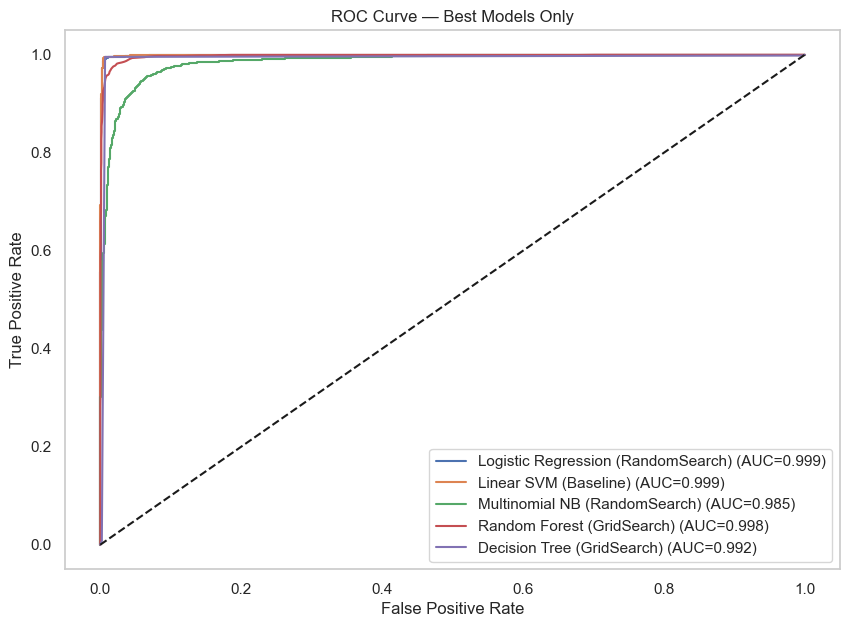

In [64]:
best_models = {
    "Logistic Regression (RandomSearch)": best_logreg,
    "Linear SVM (Baseline)": best_svm,
    "Multinomial NB (RandomSearch)": best_mnb,
    "Random Forest (GridSearch)": best_rf,
    "Decision Tree (GridSearch)": best_dt
}
best_results = {}

for name, model in best_models.items():
    y_pred = model.predict(xv_val)

    best_results[name] = {
        "model": model,
        "y_pred": y_pred,
        "accuracy": accuracy_score(y_val, y_pred),
        "precision": precision_score(y_val, y_pred, average="weighted", zero_division=0),
        "recall": recall_score(y_val, y_pred, average="weighted", zero_division=0),
        "f1": f1_score(y_val, y_pred, average="weighted", zero_division=0)
    }
from sklearn.metrics import roc_curve, auc

for name, entry in best_results.items():
    model = entry["model"]
    try:
        if hasattr(model, "predict_proba"):
            entry["probs"] = model.predict_proba(xv_val)[:,1]
        elif hasattr(model, "decision_function"):
            entry["probs"] = model.decision_function(xv_val)
        else:
            entry["probs"] = None
    except:
        entry["probs"] = None
plt.figure(figsize=(10,7))

for name, entry in best_results.items():
    if entry["probs"] is None:
        continue
    fpr, tpr, _ = roc_curve(y_val, entry["probs"])
    auc_val = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC={auc_val:.3f})")

plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve — Best Models Only")
plt.legend()
plt.grid()
plt.show()


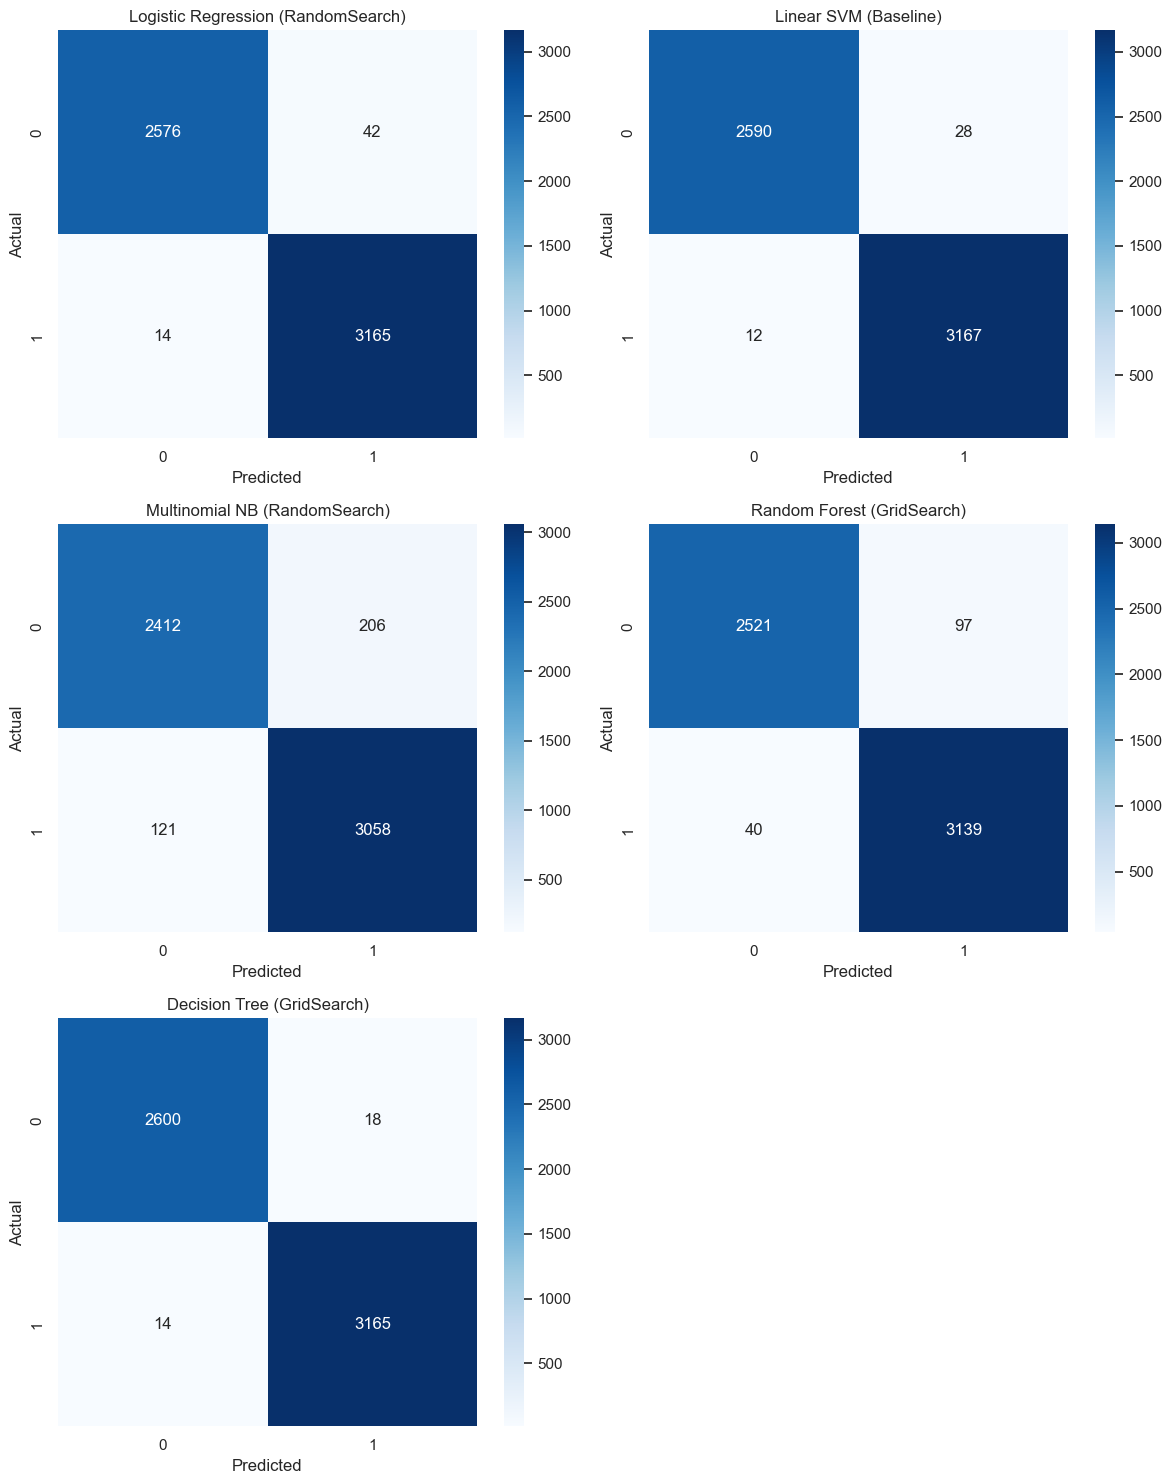

In [56]:
num = len(best_results)
cols = 2
rows = (num + 1) // cols

plt.figure(figsize=(cols*6, rows*5))

i = 1
for name, entry in best_results.items():
    cm = confusion_matrix(y_val, entry["y_pred"])
    plt.subplot(rows, cols, i)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(name)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    i += 1

plt.tight_layout()
plt.show()


In [65]:
import pandas as pd

best_summary = pd.DataFrame([
    {
        "Model": name,
        "Accuracy": entry["accuracy"],
        "Precision": entry["precision"],
        "Recall": entry["recall"],
        "F1": entry["f1"],
    }
    for name, entry in best_results.items()
]).sort_values("Accuracy", ascending=False)

best_summary


,Model,Accuracy,Precision,Recall,F1
4,Decision Tree (GridSearch),0.994480,0.994480,0.994480,0.994480
1,Linear SVM (Baseline),0.993100,0.993111,0.993100,0.993098
0,Logistic Regression (RandomSearch),0.990340,0.990377,0.990340,0.990335
3,Random Forest (GridSearch),0.976367,0.976508,0.976367,0.976342
2,Multinomial NB (RandomSearch),0.943592,0.943816,0.943592,0.943498
